# Principais Franquias da Nintendo

Nessa parte do trabalho teremos como objetivos analisar 3 das principais franquias da empresa Nintendo, tanto individualmente quanto entre elas. 

As três franquias escolhidas foram:
 - The Legend of Zelda
 - Mario Bros.
 - Pokémon
 
Com isso, iniciaremos nossas análises.

In [1]:
import pandas as pd #pip install --upgrade pandas
import numpy as np #pip install --upgrade numpy
import matplotlib.pyplot as plt #pip install --upgrade matplotlib
from db import *
from itertools import islice, cycle
import seaborn as sns #pip install --upgrade seaborn

Criando um dataframe com os dados sem alteração

In [2]:
vgsales = get_db()
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Criação dos dataframes

Para essa análise, consideramos somente os jogos que têm uma palavra chave em seu título que caracterizaria esse jogo como um jogo principal (ou, ao menos, importante) de sua respectiva franquia.

### The Legend of Zelda

Para essa franquia, selecionamos somente as que contém o nome `Zelda` em seu título.

In [3]:
zelda = vgsales[vgsales.Name.str.contains("Zelda")]
zelda.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
94,95,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
100,101,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.31
127,128,The Legend of Zelda,NES,1986,Action,Nintendo,3.74,0.93,1.69,0.14,6.51
186,187,The Legend of Zelda: Phantom Hourglass,DS,2007,Action,Nintendo,1.90,1.83,0.95,0.49,5.17
231,232,The Legend of Zelda: A Link to the Past,SNES,1991,Action,Nintendo,2.42,0.91,1.15,0.13,4.61


### Mario Bros.

O caso do Mario Bros. é o mais notável, pois há algun jogos do universo Mario que não contêm seu nome no título. Para exemplificar, existe a sequência "Wario Land". Wario é um vilão da franquia, e ganhou seu próprio jogo. O mesmo acontece com Luigi e outros pesonagens.

Contudo, para seguir o critério, selecionaremos somente os jogos que contêm o nome `Mario`. Foi necessário garantir que a palavra não estava contida em outra, neste caso, colocamos a condição que a palavra `Marionette` não poderia estar inclusa.

In [4]:
mario = vgsales[(vgsales.Name.str.contains("Mario")) & ~(vgsales.Name.str.contains("Marionette"))]
mario.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
11,12,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42


### Pokémon

Para os jogos de Pokémon, houve a necessidade de escolher duas palavras-chave por uma inconsistência de grafia. Nesse banco de dados, tanto `Pokémon` quanto `Pokemon` estavam presentes entre os jogos. Portanto, decidimos escolher ambas.

In [5]:
pokemon = vgsales[vgsales.Name.str.contains("Pokemon") | vgsales.Name.str.contains("Pokémon") ]
pokemon.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32


### Unificado

Para as comparações entre as franquias, acreditamos que será importante criar um único dataframe unindo todos os jogos. Para poder diferenciá-los, criaremos a coluna `Franchise` com sua respectiva franquia.

In [6]:
zelda = zelda.assign(Franchise = "The Legend of Zelda")
mario = mario.assign(Franchise = "Mario Bros.")
pokemon = pokemon.assign(Franchise = "Pokémon")

franchises = zelda.append(mario)
franchises = franchises.append(pokemon)
franchises = franchises.sort_values(by="Rank",ascending=True)

franchises.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Franchise
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Mario Bros.
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Mario Bros.
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Pokémon
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Mario Bros.
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,Mario Bros.


## Análises

### Vendas


In [7]:
zelda_sy = zelda.groupby(["Year"],as_index=False)[["Global_Sales"]].sum()
zelda_sy = zelda_sy[zelda_sy.Year != -1]
zelda_sy.head()

,Year,Global_Sales
1,1986,6.51
2,1987,4.38
3,1991,4.61
4,1992,3.83
5,1998,9.82


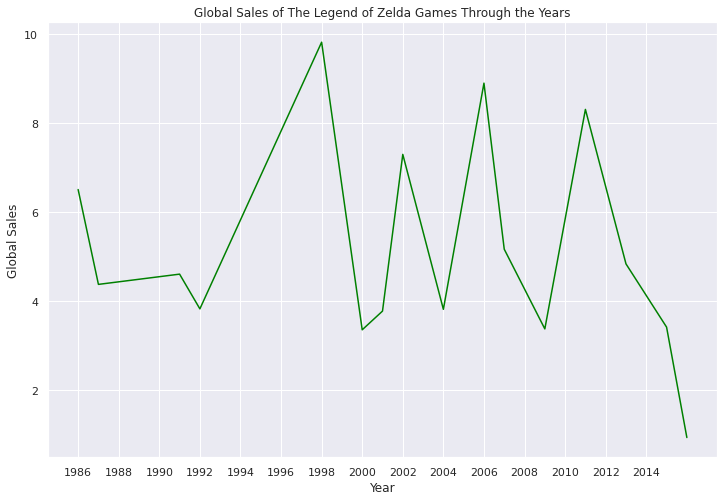

In [8]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(ax = ax, x="Year", y="Global_Sales", color="green", data=zelda_sy)
plt.xticks(range(1986,2015,2))
plt.title("Global Sales of The Legend of Zelda Games Through the Years")
ax.set(ylabel='Global Sales')
plt.show()

In [9]:
mario_sy = mario.groupby(["Year"],as_index=False)[["Global_Sales"]].sum()
mario_sy = mario_sy[mario_sy.Year != -1]
mario_sy.head()

,Year,Global_Sales
1,1982,1.59
2,1983,2.28
3,1985,40.24
4,1986,2.65
5,1988,24.74


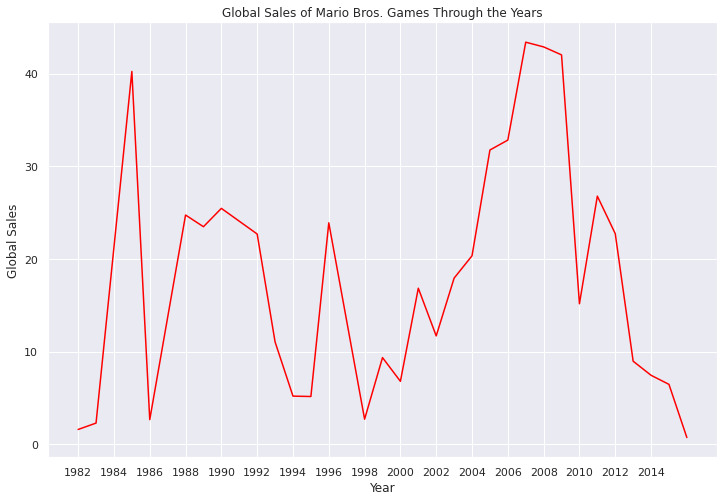

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(ax = ax, x="Year", y="Global_Sales", color="red", data=mario_sy)
plt.xticks(range(1982,2015,2))
plt.title("Global Sales of Mario Bros. Games Through the Years")
ax.set(ylabel='Global Sales')
plt.show()

In [11]:
pokemon_sy = pokemon.groupby(["Year"],as_index=False)[["Global_Sales"]].sum()
pokemon_sy.head()

,Year,Global_Sales
0,1996,31.37
1,1998,18.34
2,1999,37.49
3,2000,9.57
4,2001,0.89


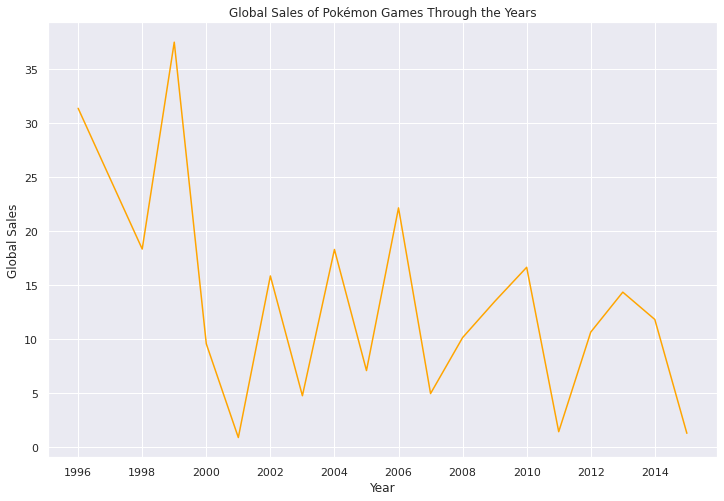

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(ax = ax, x="Year", y="Global_Sales", color="orange", data=pokemon_sy)
plt.xticks(range(1996,2015,2))
plt.title("Global Sales of Pokémon Games Through the Years")
ax.set(ylabel='Global Sales')
plt.show()

In [13]:
franchises_sy = franchises.groupby(["Year", "Franchise"],as_index=False)[["Global_Sales"]].sum()
franchises_sy = franchises_sy[franchises_sy.Year != -1]
franchises_sy.head()

,Year,Franchise,Global_Sales
2,1982,Mario Bros.,1.59
3,1983,Mario Bros.,2.28
4,1985,Mario Bros.,40.24
5,1986,Mario Bros.,2.65
6,1986,The Legend of Zelda,6.51


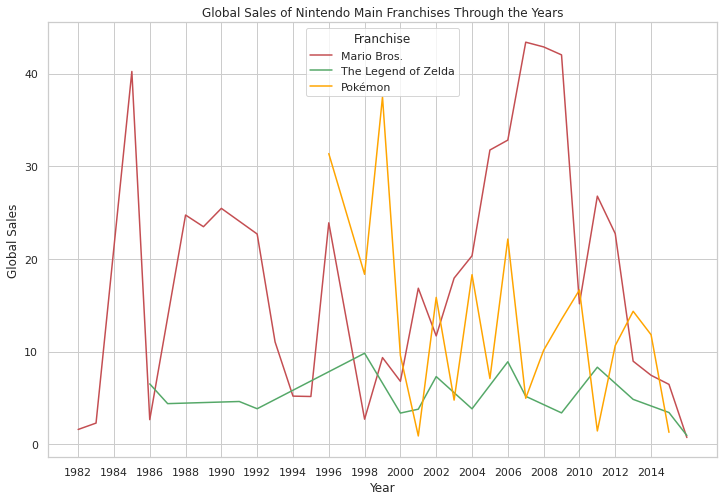

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(ax = ax, x="Year", y="Global_Sales", hue='Franchise',palette=['r','g','orange'], data=franchises_sy)
plt.xticks(range(1982,2015,2))
plt.title("Global Sales of Nintendo Main Franchises Through the Years")
ax.set(ylabel='Global Sales')
plt.show()

### Média de vendas por jogo

In [15]:
franchises_as = franchises.groupby(["Franchise"],as_index=False)[["Name"]].count()
franchises_sales = franchises.groupby(["Franchise"],as_index=False)[["Global_Sales"]].sum()
franchises_as = franchises_as.assign( Global_Sales = franchises_sales["Global_Sales"])
franchises_as = franchises_as.assign( Sales_Average = lambda df: df["Global_Sales"]/df["Name"])
franchises_as

,Franchise,Name,Global_Sales,Sales_Average
0,Mario Bros.,112,555.23,4.957411
1,Pokémon,48,250.57,5.220208
2,The Legend of Zelda,27,82.64,3.060741


### Jogos por Gênero

In [16]:
franchises_qg = franchises.groupby(["Franchise","Genre"],as_index=False)[["Name"]].count()
franchises_qg.head()

,Franchise,Genre,Name
0,Mario Bros.,Action,4
1,Mario Bros.,Adventure,1
2,Mario Bros.,Misc,17
3,Mario Bros.,Platform,33
4,Mario Bros.,Puzzle,14


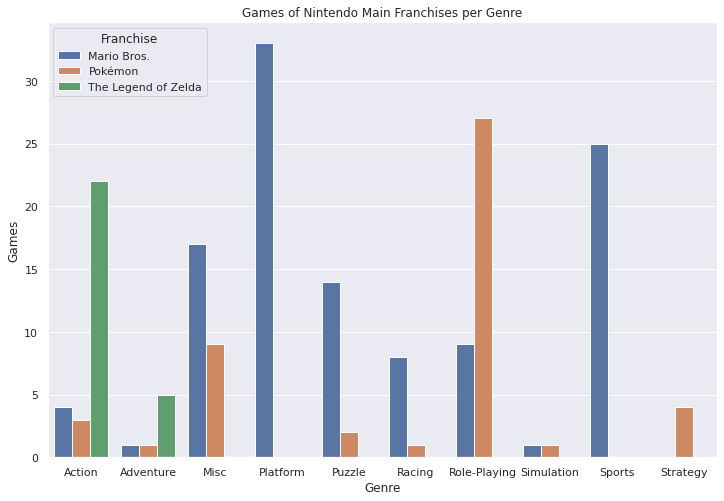

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(ax = ax, x="Genre", y="Name", data=franchises_qg, hue="Franchise")
ax.set(ylabel='Games', title='Games of Nintendo Main Franchises per Genre')
plt.show()

### Jogos por Plataforma


In [18]:
franchises_gp = franchises.groupby(["Franchise","Platform"],as_index=False)[["Name"]].count()
franchises_gp.head()

,Franchise,Platform,Name
0,Mario Bros.,2600,1
1,Mario Bros.,3DS,15
2,Mario Bros.,DS,11
3,Mario Bros.,GB,8
4,Mario Bros.,GBA,16


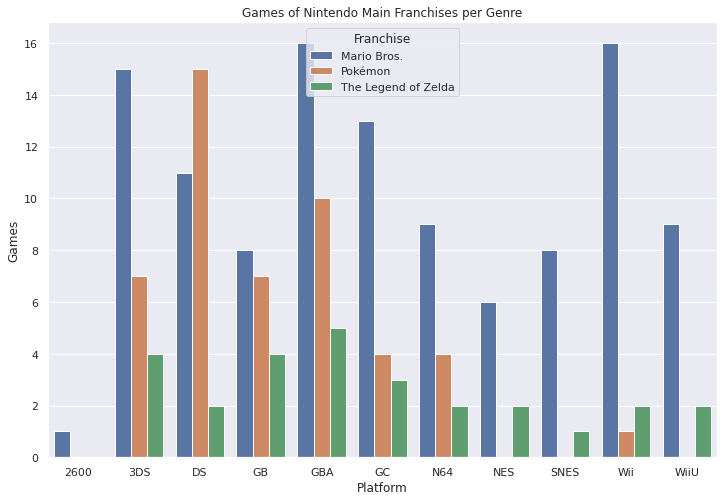

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(ax = ax, x="Platform", y="Name", data=franchises_gp, hue="Franchise")
ax.set(ylabel='Games', title='Games of Nintendo Main Franchises per Genre')
plt.show()

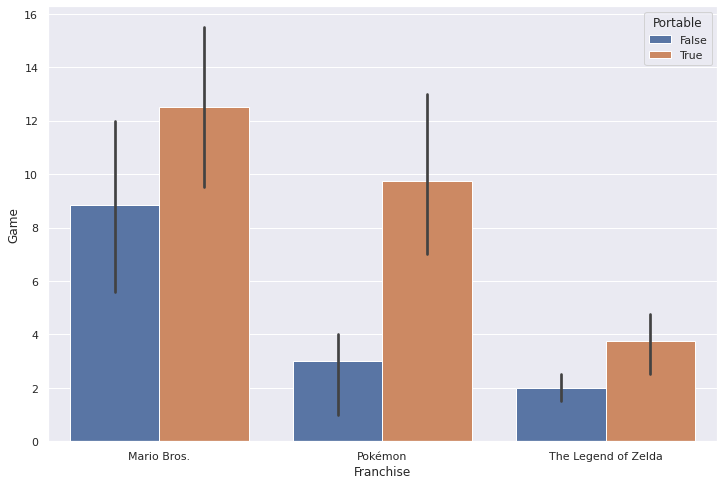

In [20]:
franchises_ptb = franchises_gp.assign(
    Portable = lambda dataframe: dataframe['Platform'].map(lambda platform: True if platform in ('3DS','GB','GBA','DS') else False) 
)

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(ax = ax, x="Franchise", y="Name", data=franchises_ptb, hue="Portable")
ax.set(ylabel='Game')
plt.show()

In [21]:
# Várzea

In [22]:
pokemon_gg = pokemon.groupby(["Platform"],as_index=False)[["Name"]].count()
pokemon_gg = pokemon_gg.sort_values(by="Name",ascending=True)
pokemon_gg.head()

,Platform,Name
6,Wii,1
4,GC,4
5,N64,4
0,3DS,7
2,GB,7


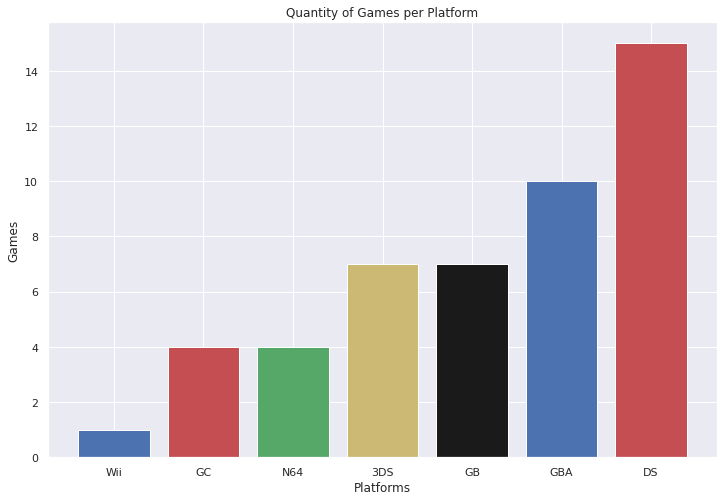

In [23]:
plt.figure(figsize=(12, 8))
#fig.add_axes([0,0,1,1])
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(pokemon_gg)))
plt.bar(pokemon_gg["Platform"],pokemon_gg["Name"], color = my_colors)
plt.xlabel("Platforms")
plt.ylabel("Games")
plt.title("Quantity of Games per Platform")
plt.show()

<AxesSubplot:ylabel='Platform'>

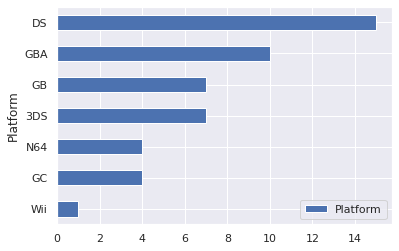

In [24]:
pokemon_gg.plot(x = "Platform", y = "Name", kind="barh", label= "Platform")

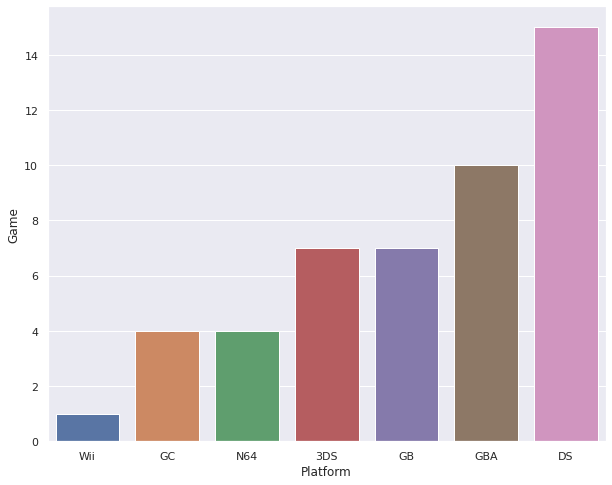

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(ax = ax, x="Platform", y="Name", data=pokemon_gg)
ax.set(ylabel='Game')
plt.show()

In [26]:
pokemon_gg

,Platform,Name
6,Wii,1
4,GC,4
5,N64,4
0,3DS,7
2,GB,7
3,GBA,10
1,DS,15


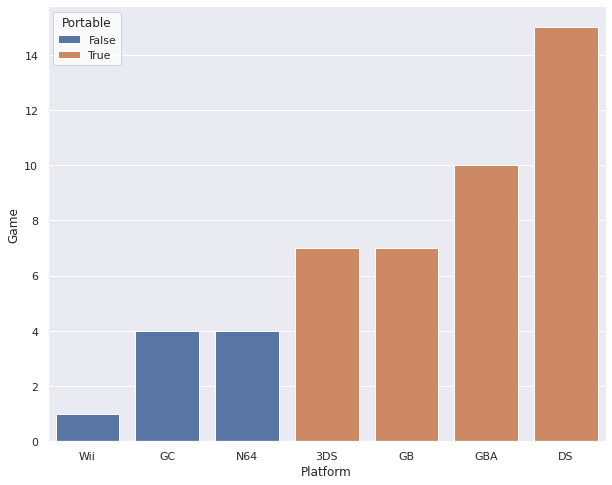

In [27]:
pokemon_ggp = pokemon_gg.assign(
    Portable = lambda dataframe: dataframe['Platform'].map(lambda platform: True if platform in ('3DS','GB','GBA','DS') else False) 
)

fig, ax = plt.subplots(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.barplot(ax = ax, x="Platform", y="Name", data=pokemon_ggp, hue="Portable", dodge=False)
ax.set(ylabel='Game')
plt.show()